## **Data Science Aplicado a las Finanzas** 🚀
### **Sesión 3:  Análisis Estadístico Aplicado**

Andrés C. Medina Sanhueza

Senior Datascientist Engineer 

anmedinas@gmail.com

**Tópicos** ✏️
1. **Sesión 3**
  * Transformación de datos financieros 
  * Análisis de relaciones entre variables 
  * Comparación estadística de activos
  
  ---

In [1]:
from matplotlib import pyplot as plt
from functions import *
import seaborn as sns
import yfinance as yf
import pandas as pd
import numpy as np

sns.set_style("dark")

## ⛵ Transformación de Datos Financieros 

La mayoría de los estudios financieros, implican el análisis en términos
de retornos en lugar de los precios. Campebell, Lo \& Mackinlay 1997 dan
dos razones principales para usar los retornos:

* El rendimiento ó retorno, son un resumen completo y libre de *escala* de oportunidad del inversor
  
* Las series de retornos son más fáciles de manipular que la serie de precios, ya que la serie de retornos tiene *propiedades estadísticas atractivas* 📌

🔔 **`¿Por qué es importante el retorno?`**

* `Rendimiento de la inversión` : La rentabilidad ofrece a los inversores una idea del rendimiento de su inversión. Una rentabilidad positiva indica una ganancia, mientras que una negativa indica una pérdida.

* `Evaluación de riesgos` : La rentabilidad también ayuda a evaluar el riesgo de una inversión. La volatilidad de los precios puede generar altas rentabilidades o pérdidas significativas.

### Retornos Simples y Logarítmicos

El **retorno simple** para un período, se calcula como : 

\begin{equation*}
R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1
\end{equation*}

Donde $P_t$ es el precio del activo en el tiempo $t$ y $P_{t-1}$ es el precio del activo en el tiempo $t-1$. Este retorno mide el cambio porcentual en el precio del activo durante un período específico.

El **retorno bruto** se define como:

\begin{equation*}
1 + R_t = \frac{P_t}{P_{t-1}}
\end{equation*}


El **retorno logarítmico**, también conocido como retorno continuo, se calcula como:

\begin{equation*}
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right) = \ln(P_t) - \ln(P_{t-1})
\end{equation*}

Los **retornos multi-períodos** pueden calcularse para múltiples períodos, ya sea utilizando **retornos simples** ó **logarítmicos**. 

\begin{equation*}
\begin{aligned}
1 + R_t(k) &= \frac{P_t}{P_{t-1}}\cdot\frac{P_{t-1}}{P_{t-2}}\cdot\frac{P_{t-2}}{P_{t-3}}\cdots \frac{P_{t-k}}{P_{t-k-1}} \\
&= (1+R_t)\cdot(1+R_{t-1})\cdots(1+R_{t-k}) \\
&= \prod_{i=0}^{k} (1+R_{t-i}) 
\end{aligned}
\end{equation*}

En el caso de **retornos logarítmicos**, la aditividad facilita el cálculo de retornos acumulados sobre varios períodos.

\begin{equation*}
r_t(k) = \sum_{i=0}^{k-1}r_{t-i}
\end{equation*}

YF.download() has changed argument auto_adjust default to True


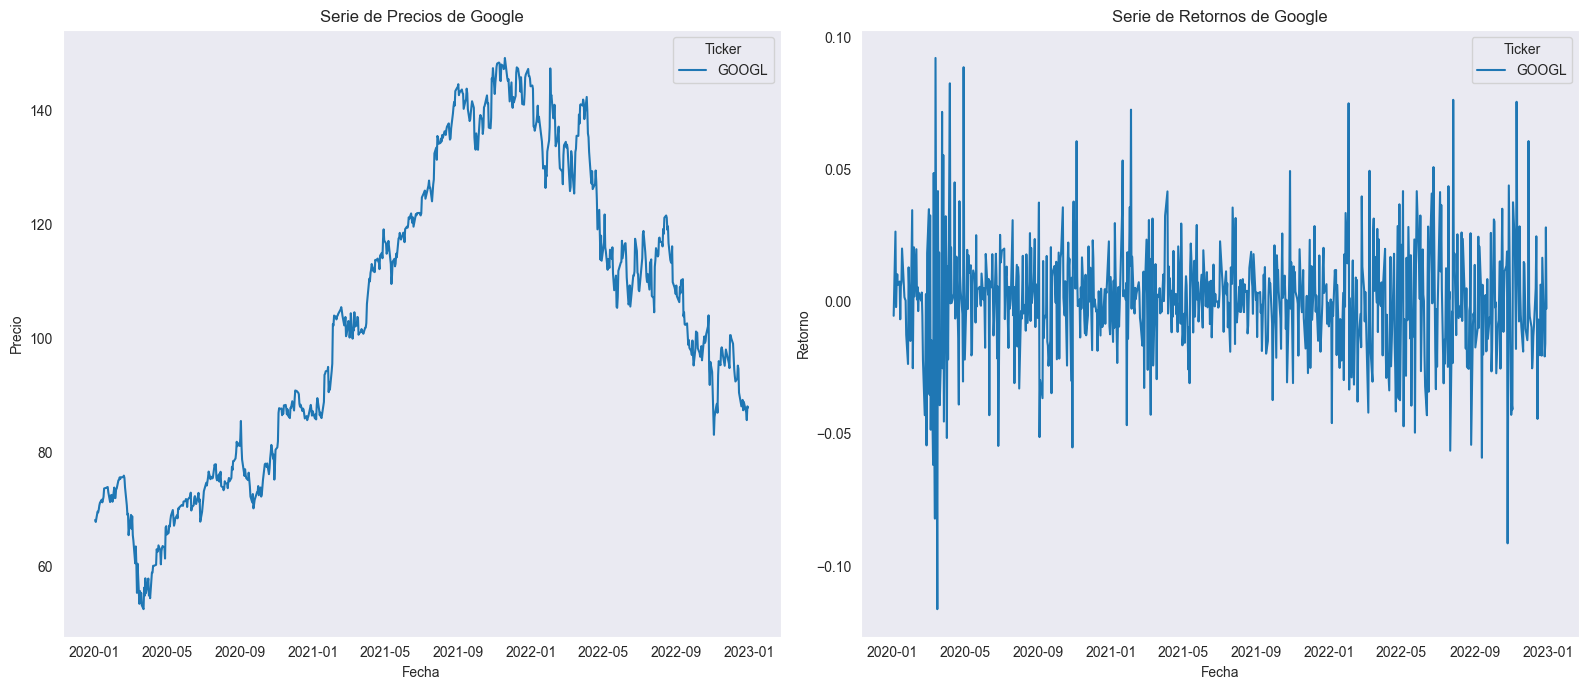

In [2]:
# Ejemplo Serie de Precios y Retornos de Google 
precios  = yf.download('GOOGL', start = '2020-01-01', end = '2023-01-01', progress = False)['Close']
retornos = precios.pct_change().dropna()

fig, axes = plt.subplots(1, 2, figsize = (16, 7))

sns.lineplot(data = precios, ax = axes[0])
axes[0].set_title('Serie de Precios de Google')
axes[0].set_xlabel('Fecha')
axes[0].set_ylabel('Precio')

sns.lineplot(data = retornos, ax = axes[1])  
axes[1].set_title('Serie de Retornos de Google')
axes[1].set_xlabel('Fecha')
axes[1].set_ylabel('Retorno')
plt.tight_layout()
plt.show()

### Retornos Diarios, Semanales y Mensuales

In [3]:
# Precios de Cierre de Google 
df = yf.download('GOOGL', start = '2020-01-01', end = '2023-01-01', progress = False)['Close']

In [4]:
# Retorno Diario Simple / logaritmico
dayli_simple_return = df.pct_change()
dayli_log_return = np.log(df / df.shift(1))

In [5]:
# Retornos Semanales
weekly_prices = df.resample('W').last()
weekly_simple_return = weekly_prices.pct_change()
weekly_log_return = np.log(weekly_prices / weekly_prices.shift(1))

In [6]:
# Retornos Mensuales
monthly_prices = df.resample('ME').last()
monthly_simple_return = monthly_prices.pct_change()
monthly_log_return = np.log(monthly_prices / monthly_prices.shift(1))

# Retorno a 5 dias 
rolling_5d_simple_return = df.pct_change(periods = 5)
rolling_5d_log_return = np.log(df / df.shift(5))

### Estandarización y Normalización 

<tr>
<td><img src="../figs/norm_stand.png" style="width: 1000px;"/> </td>
</tr>

La normalización es un proceso que ajusta los valores de una característica para que se encuentren dentro de un rango específico, generalmente entre 0 y 1.

\begin{equation*}
x' = \frac{x - \min(x)}{\max(x) - \min(x)}
\end{equation*}

Por otro lado, la estandarización es un proceso que transforma los valores de una característica para que tengan una media cero y una desviación estándar de uno. Esto se logra restando la media de la característica y dividiendo por la desviación estándar

\begin{equation*}
x' = \frac{x - \mu}{\sigma}
\end{equation*}

🔔 **`¿Por qué son relevantes?`**

* `Comparación de activos`: Generalmente los precios y retornos tienen diferentes escalas y volatilidades, aplicando estrategias de normalización y estandarización, permite comparar activos heterogéneos bajo la misma métrica. 

* `Preparación para modelos estadísticos y de machine learning` : Muchos modelos estadísticos y de machine learning (regresión, PCA, clustering, SVM, etc) asumen que los datos están centrados y con varianza homogénea . La normalización y estandarización ayudan a cumplir con estas suposiciones, mejorando la convergencia y el rendimiento del modelo.

* `Reducción de sesgo` : La normalización y la estandarización también pueden ayudar a reducir el impacto de los valores atípicos o outliers en el modelo. Al escalar los datos, estos valores extremos tendrán menos influencia en la distribución general de los datos.

In [7]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Descarga Serie de Precios de Cierre de Netflix
df_netflix = yf.download('NFLX', start = '2020-01-01', end = '2023-01-01', progress = False)['Close'] 

# Retornos Diarios (simples y logaritmicos)
sm_return = df_netflix.pct_change().dropna()
log_return = np.log(df_netflix / df_netflix.shift(1))

In [8]:
sm_return.NFLX.values

array([-1.18553218e-02,  3.04694473e-02, -1.51266616e-02,  2.57294324e-02,
       -1.06113482e-02, -1.96925931e-02,  2.99955204e-02, -6.78658613e-04,
        1.12198435e-03, -1.32719556e-03,  3.10087510e-03, -4.59277538e-03,
       -3.58167043e-02,  7.23926568e-02,  1.01830592e-02, -2.91086156e-02,
        1.64488569e-02, -1.53792767e-02,  1.33465046e-02, -7.62061877e-03,
        3.74105416e-02,  3.07542172e-02,  1.78857929e-03, -7.35791685e-03,
       -4.90593234e-04,  1.17240190e-02,  7.06064911e-03,  1.69124335e-02,
        3.65775663e-03, -2.62191929e-03,  1.94006441e-02, -4.10025360e-03,
       -4.91992129e-04, -1.53626753e-02, -2.99155285e-02, -2.33523612e-02,
        5.31811327e-02, -1.98554978e-02, -7.20990217e-03,  3.25718480e-02,
       -3.22267397e-02,  4.07300485e-02, -2.86875883e-02, -1.02204989e-02,
       -6.09263922e-02,  5.09106039e-02, -3.90245002e-02, -9.90798242e-02,
        6.67723641e-02, -1.11388620e-01,  6.99705659e-02, -1.33854536e-02,
        5.24930976e-02,  

In [9]:
# Normalizacion (Min-Max Scaling)
scaler = MinMaxScaler()
X_scaled_minmax = scaler.fit_transform(sm_return.NFLX.values.reshape(-1, 1))

# Estandarizacion (Scandard Scaling)
scaler = StandardScaler()
X_scaled_standard = scaler.fit_transform(sm_return.NFLX.values.reshape(-1, 1))

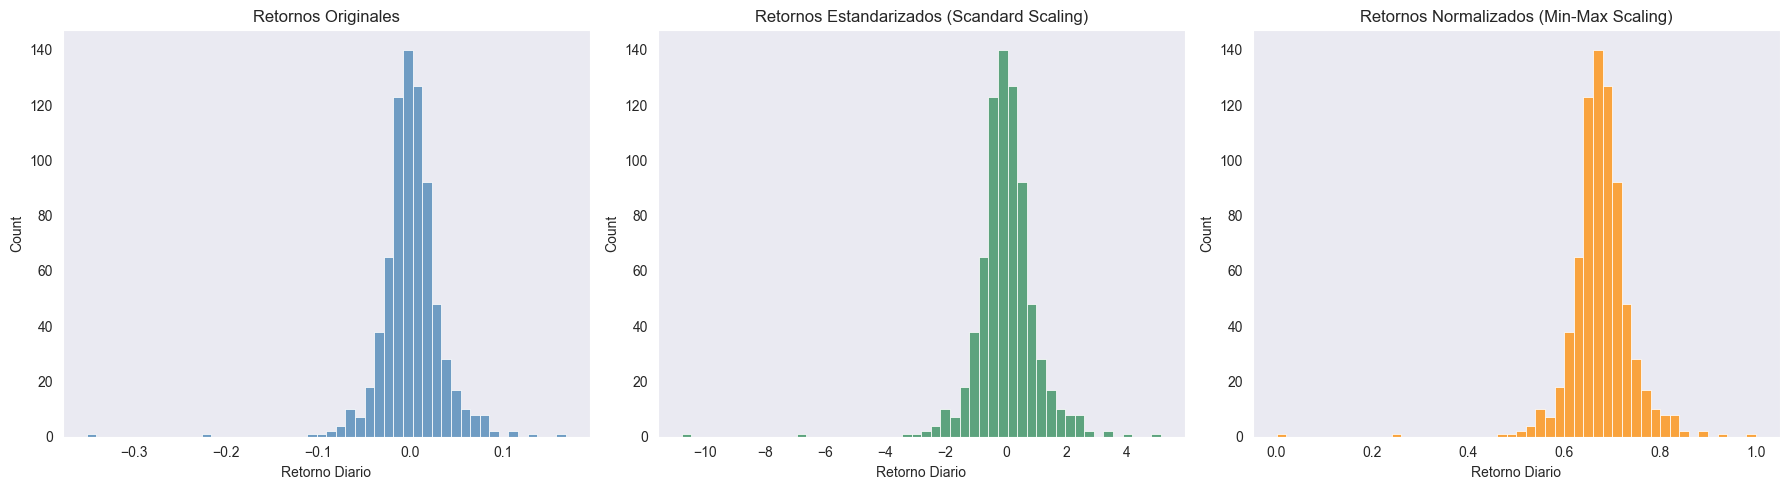

In [10]:
df_plot = pd.DataFrame({
    'Original': sm_return.NFLX.values,
    'Estandarizado': X_scaled_standard.ravel(),
    'Normalizado': X_scaled_minmax.ravel()
})

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df_plot['Original'], kde = False, bins = 50, ax = axes[0], color = 'steelblue')
axes[0].set_title('Retornos Originales')
axes[0].set_xlabel('Retorno Diario')

# Histograma de la serie estandarizada
sns.histplot(df_plot['Estandarizado'], kde = False, bins = 50, ax = axes[1], color = 'seagreen')
axes[1].set_title('Retornos Estandarizados (Scandard Scaling)')
axes[1].set_xlabel('Retorno Diario')

# Histograma de la serie normalizada
sns.histplot(df_plot['Normalizado'], kde = False, bins = 50, ax = axes[2], color = 'darkorange')
axes[2].set_title('Retornos Normalizados (Min-Max Scaling)')
axes[2].set_xlabel('Retorno Diario')

plt.tight_layout()
plt.show()


## 📌 Propiedades Estadísticas de los Retornos

 Cuando hablamos de propiedades estadísticas, nos estamos refiriendo al concepto de *hechos estilizados de los retornos*, es decir, patrones empíricos típicos que exhiben los retornos de activos financieros, como acciones, bonos, divisas, etc. 
 
 El término *hechos estilizados de los retornos (stylized facts of returns)* se refiere a un conjunto de propiedades empíricas comúnes y recurrentes que se observan en las series temporales de retornos financieros, independientemente del activo, mercado o período de tiempo. 

### No Normalidad de los Retornos (Fat Tails)

Los retornos de los activos financieros tienen distribuciones con colas más pesadas que una distribución normal. Esto significa que los eventos extremos (grandes subidas o bajadas) ocurren con mayor frecuencia de lo que predeciría una distribución normal.

### Leptokurtosis

Las series de retornos muestran una forma de leptocurtosis, es decir, tienen peaks más altos y colas más gruesas (*fat tails*) que la distribución normal. Esto refleja la mayor frecuencia de movimientos pequeños y de movimientos extremos en comparación con una distribución normal.

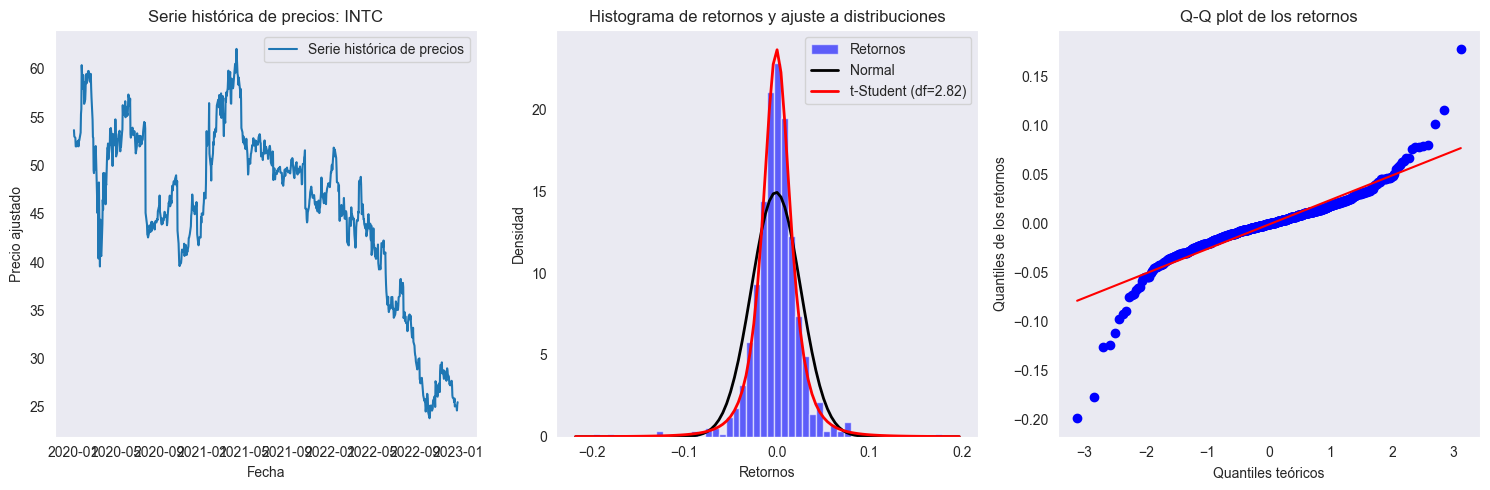

In [11]:
# Genera Histograma y Trayectora de acciones de INTC
plot_stock_returns_with_distribution('INTC', '2020-01-01', '2023-01-01')

### Volatilidad Agrupada (Clustering)

La volatilidad de los retornos tiende a agruparse. Esto significa que períodos de alta volatilidad tienden a ser seguidos por más períodos de alta volatilidad, y periodos de baja volatilidad tienden a ser seguidos por más períodos de baja volatilidad. Este fenómeno es conocido como agrupamiento de volatilidad o volatilidad autocorrelacionada.

### Asimetría en las Volatilidades

La asimetría en una serie de retornos, particularmente en el contexto del efecto de apalancamiento (Leverage Effect), se refiere a la relación entre la volatilidad y los retornos. En muchas series financieras, se observa que cuando los retornos son negativos (pérdidas), la volatilidad tiende a aumentar más que cuando los retornos son positivos (ganancias). Este fenómeno es conocido como el efecto de apalancamiento. 

Existen diferentes formas para detectar la asimetría en la serie de retornos, por ejemplo:

* Regresión Asimétrica de Volatilidad

* Modelos Garch Asimétricos (EGARCH - GJR-GARCH)

* Coeficiente de Asimetría

### Ausencia de Correlación en los Retornos, pero correlación en las volatilidades

Los retornos de las series financieras suelen ser aproximadamente no correlacionados (especialmente a corto plazo), lo que implica que es difícil predecir el nivel de retornos futuros a partir de los pasados. Sin embargo, la volatilidad sí muestra autocorrelación, como lo refleja el fenómeno de clustering.

En general, el retorno de las series $r_t$ se expresa como:

\begin{equation*}
r_t = \mu_t + \epsilon
\end{equation*}

Donde $r_t$ es el retorno en el tiempo $t$, $\mu_t$ es la media condicional de los retornos que puede ser constante o depender de otros factores, $\epsilon_t$ es el componente de error (ruido blanco) que captura la parte impredecible de los retornos y que tiene varianza condicional $\sigma_t^2$

El error $\epsilon_t$ se modela de manera que:

\begin{equation*}
\epsilon_t = \sigma_t z_t
\end{equation*}

Donde $\sigma_t$ es la desviación estandar condicional (volatilidad) en el tiempo $t$ y $z_t$ es un término de ruido blanco estandarizado (normalmente distribuido con media 0 y varianza 1).

##  🍁 Análisis de relaciones entre variables

### Correlación de Pearson, Spearman y $\tau$ de Kendall 

La correlación mide la relación lineal entre dos variables numéricas. Si dos variables tienen una correlación fuerte, un cambio en una de ellas estará asociado con un cambio en la otra. La correlación varía entre -1 y 1.

<tr>
<td><img src="../figs/correlations.png" style="width: 1000px;"/> </td>
</tr>



Tipos de correlación:

* **`Correlación de Pearson`** Mide la relación lineal entre dos variables cuantitativas, es decir, asume que la relación de las variables es lineal. Es sensible a valores atípicos. 

\begin{equation*}
r_{ij} = \frac{\sum_{i}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i}^{n}(x_i - \bar{x})^2}\sqrt{\sum_{i}^{n}(y_i - \bar{y})^2}}
\end{equation*}


* **`Correlación de Spearman`** Es una medida de la relación monótona entre dos variables, basada en rangos (no requiere relación lineal). Es más robusta frente a valores atípicos y es útil para datos que no tienen una distribución normal. Si definimos $d_i$ como la diferencia entre los rangos de las dos variables para cada observación, y $n$ es el número total de observaciones, entonces la correlación de Spearman se calcula como:

\begin{equation*}
\rho = 1 - \frac{6\sum_{i=1}^{n}d_i^2}{n(n^2-1)}
\end{equation*}


* **`Tau de Kendall`** También mide relaciones monótonas y se basa en pares ordenados. Es menos común, pero es útil cuando se tiene un conjunto de datos pequeño o cuando se espera ruido en los datos.

[[ 1.0106366  -0.00453841]
 [-0.00453841  0.99431497]]
Correlación Pearson: r=-0.004527348015879751, p-value=0.7489278154356661


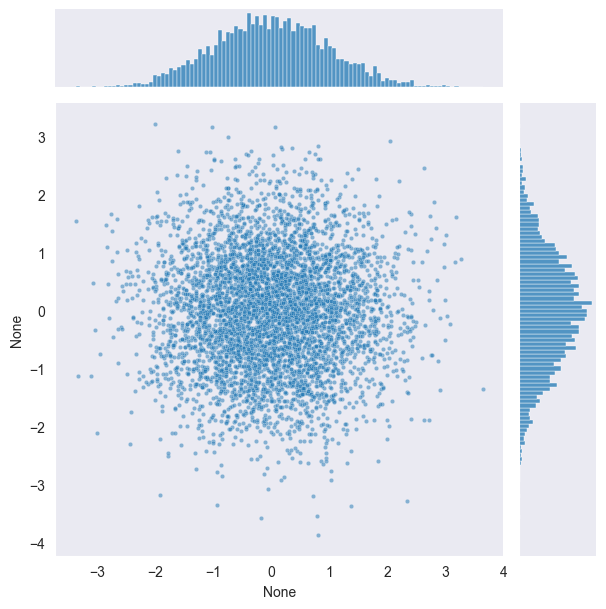

In [12]:
from scipy.stats import norm, pearsonr

x = norm.rvs(size = 5000, loc = 0, scale = 1)
y = norm.rvs(size = 5000, loc = 0, scale = 1)

M = np.stack((x, y), axis=0)
print(np.cov(M))

r, p = pearsonr(x,y)
print(f"Correlación Pearson: r={r}, p-value={p}")

g = sns.JointGrid(x=x,y=y)
g.plot_joint(sns.scatterplot, s=10, alpha=.5)
g.plot_marginals(sns.histplot, kde=False, bins=100)
plt.show()

In [13]:
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2022-01-01'
end_date = '2023-12-31'

# Descargar datos de precios
data = yf.download(tickers, start = start_date, end = end_date, progress = False)['Close']

# Calcular retornos diarios
returns = data.pct_change().dropna()

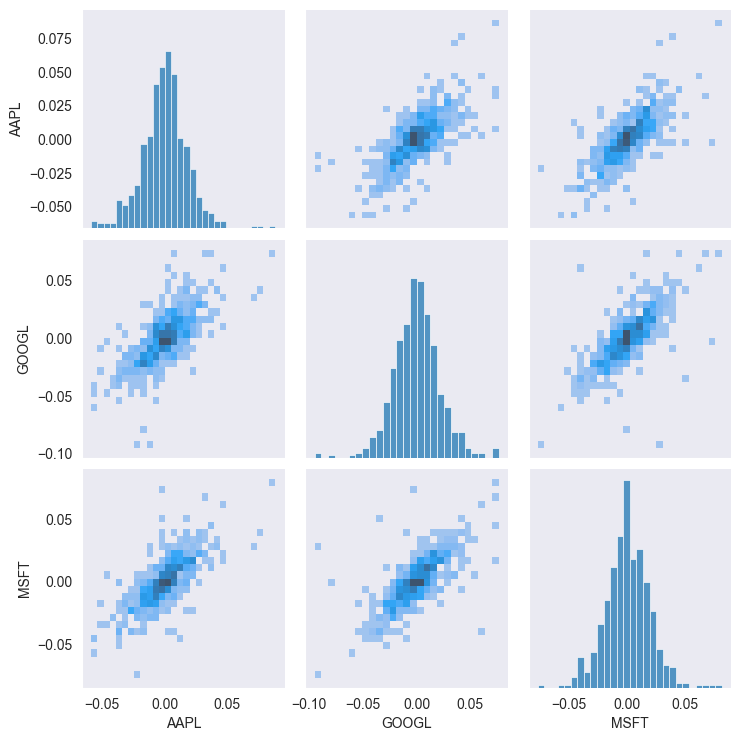

In [14]:
# Visualizacion retornos de activos
sns.pairplot(returns, kind="hist")

In [15]:
# Correlacion de Pearson 
returns.corr(method = 'pearson')


Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,1.000000,0.704407,0.740862
GOOGL,0.704407,1.000000,0.729521
MSFT,0.740862,0.729521,1.000000


In [16]:
returns.corr(method = 'spearman')

Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,1.000000,0.719882,0.756992
GOOGL,0.719882,1.000000,0.767443
MSFT,0.756992,0.767443,1.000000


In [17]:
returns.corr(method='kendall')

Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,1.000000,0.533253,0.574022
GOOGL,0.533253,1.000000,0.591615
MSFT,0.574022,0.591615,1.000000


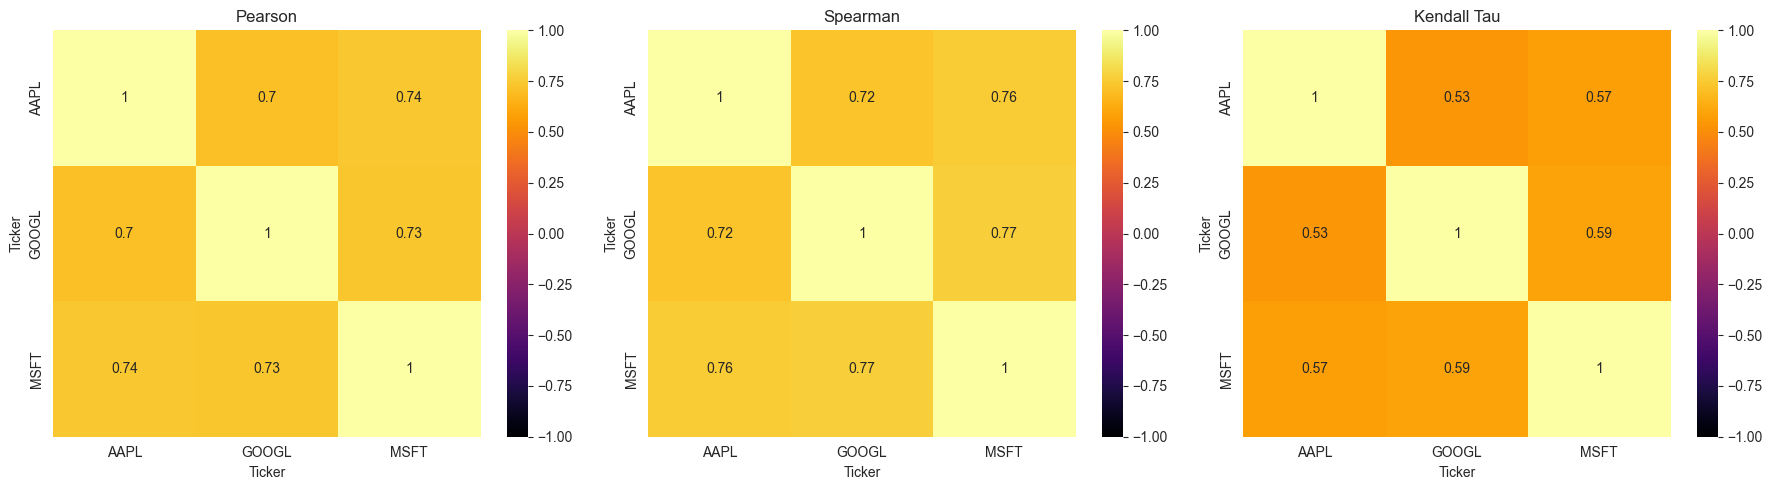

In [18]:
# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(returns.corr(method = 'pearson'), 
            annot = True, 
            cmap = 'inferno', 
            ax = axes[0], 
            vmin = -1, 
            vmax = 1)
axes[0].set_title('Pearson')


sns.heatmap(returns.corr(method = 'spearman'), 
            annot = True, 
            cmap = 'inferno', 
            ax = axes[1], 
            vmin = -1, 
            vmax = 1)
axes[1].set_title('Spearman')

sns.heatmap(returns.corr(method='kendall'),
            annot = True, 
            cmap = 'inferno', 
            ax = axes[2], 
            vmin = -1, 
            vmax = 1)
axes[2].set_title('Kendall Tau')

# Ajustar espacio
plt.tight_layout()
plt.show()

### Matriz de Correlación entre Activos

In [19]:
# Conjunto de Tickers para construir el Portafolio
tickers = ['IR', 'EXC', 'APH', 'LOW', 'JPM', 'SBUX',
           'DHI', 'MCHP', 'NTRS', 'CNP', 'M', 'O', 'CMI',
           'EQT', 'ECL', 'HRB', 'GM', 'NOV', 'SWK',
           'UNP', 'COF', 'CMS', 'EMN', 'AAPL']

# Ordeno los Tickers 
tickers.sort()

# Guardo el total de Tickers 
n = len(tickers)

start = '1999-12-01' # fecha inicio 
end = '2019-12-31'   # fecha termino 

# Descarga de Series historias (Precios de Cierre)
data = yf.download(tickers, start = start, end = end, progress = False)["Close"]

# Agrupa los datos en intervalos de tiempo mensuales.
data = data.resample('ME').last()

# Genera los Retornos logaritmicos
returns = data.pct_change().dropna()

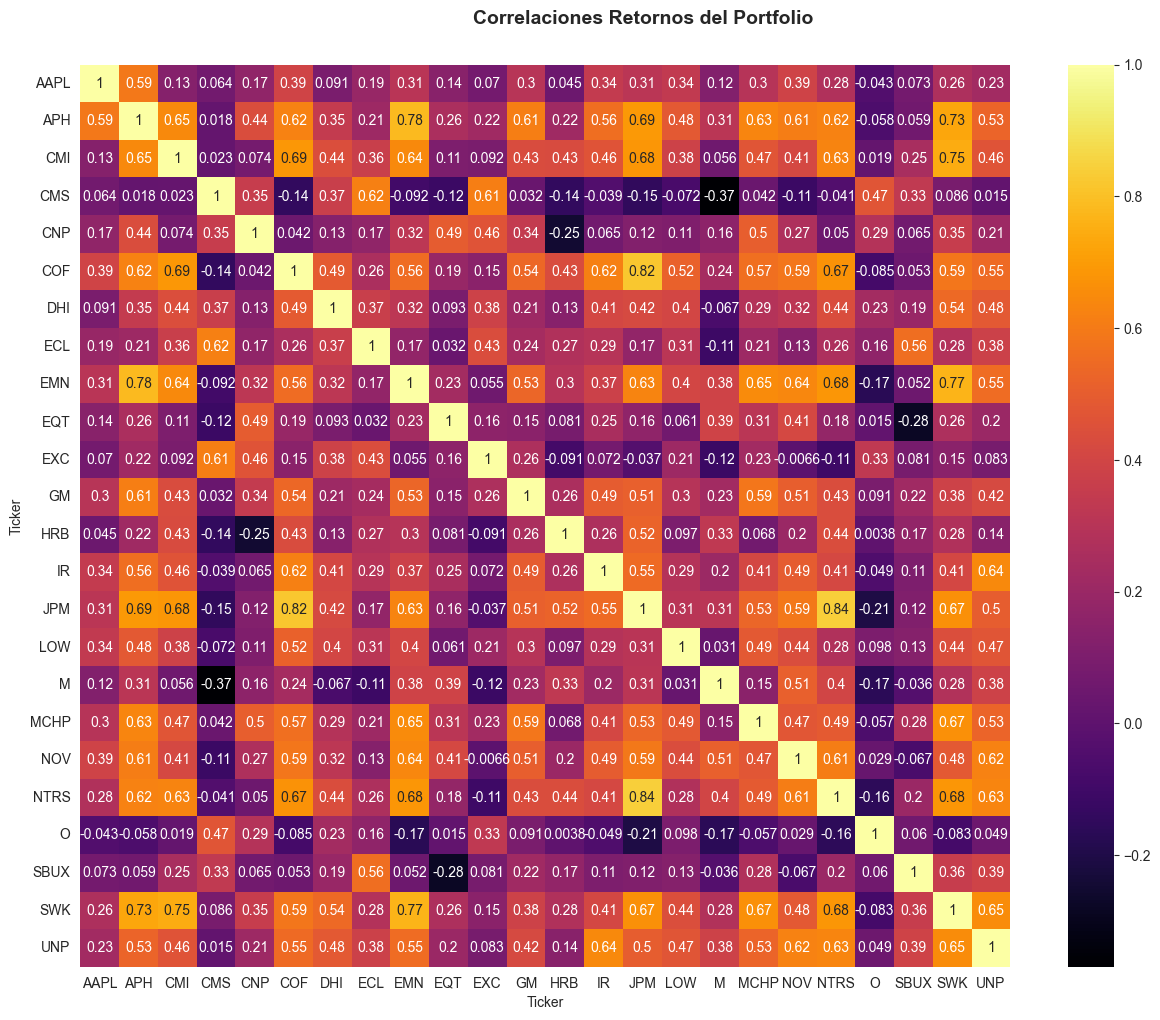

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (15, 11))
corr = returns.corr()
sns.heatmap(corr, ax = ax, cmap = 'inferno', annot = True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Retornos del Portfolio', fontsize = 14, fontweight = 'bold')
plt.show()

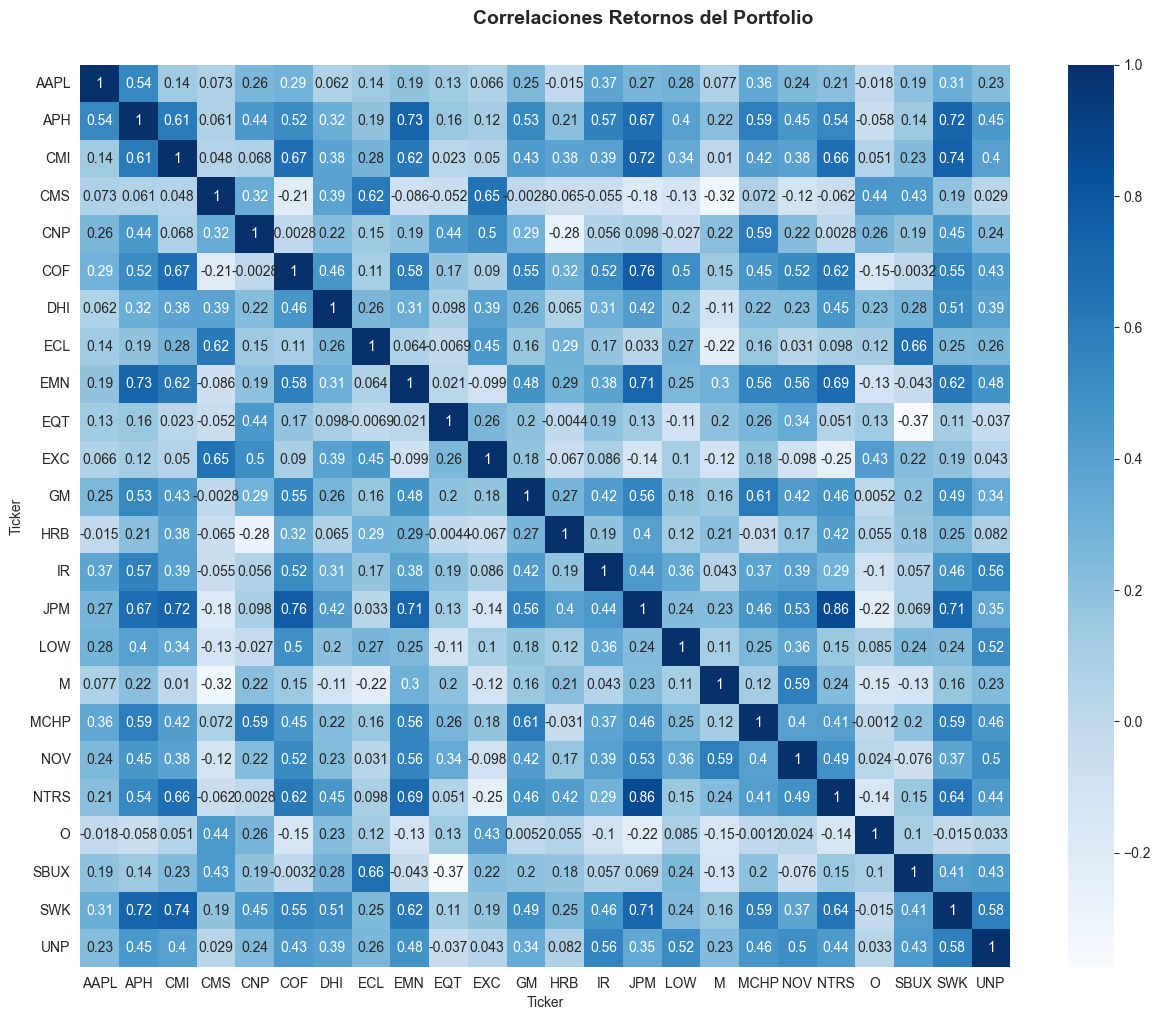

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
corr = returns.corr(method = 'spearman')
sns.heatmap(corr, ax = ax, cmap = 'Blues', annot = True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Retornos del Portfolio', fontsize = 14, fontweight = 'bold')
plt.show()

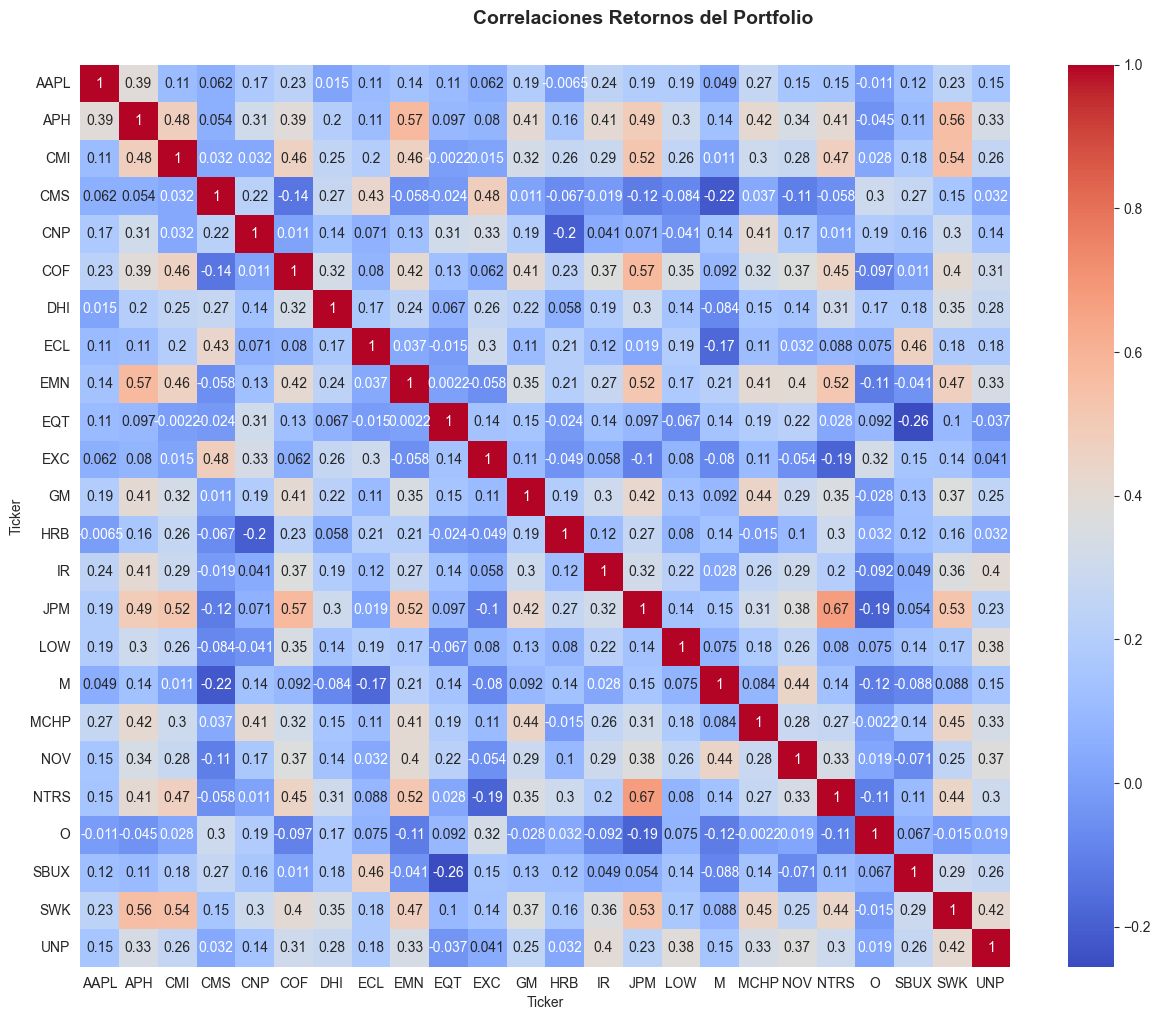

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 11))
corr = returns.corr(method = 'kendall')
sns.heatmap(corr, ax = ax, cmap = 'coolwarm', annot = True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Retornos del Portfolio', fontsize = 14, fontweight = 'bold')
plt.show()

### Covarianza y Varianza Conjunta

La covarianza es una medida de cómo dos variables cambian juntas. Si las dos variables tienden a aumentar y disminuir juntas, la covarianza será positiva. Si una variable tiende a aumentar cuando la otra disminuye, la covarianza será negativa. La covarianza se define como:

\begin{equation*}
\textsf{Cov}(R_{i}, R_{j}) = \mathbb{E}[(R_{i} - \mu_{i})(R_{j} - \mu_{j})] 
\end{equation*}

Donde $R_i$ y $R_j$ son los retornos de los activos $i$ y $j$, respectivamente, y $\mu_i$ y $\mu_j$ son las medias de los retornos de los activos $i$ y $j$. 

En un contexto de diversificación de carteras, la covarianza es importante porque ayuda a entender cómo los activos se mueven juntos. Si dos activos tienen una covarianza alta y positiva, significa que tienden a moverse en la misma dirección, lo que puede aumentar el riesgo de la cartera. Por otro lado, si tienen una covarianza baja o negativa, pueden ofrecer beneficios de diversificación. Esto, se puede resumir como: 

* Si $\textsf{Cov}(R_{i}, R_{j}) < 0$ los activos tienden a moverse en direcciones opuestas → buena diversificación.
  
* Si $\textsf{Cov}(R_{i}, R_{j}) > 0$ los activos se mueven juntos → menos diversificación.
  
* Si $\textsf{Cov}(R_{i}, R_{j}) = 0$ los activos son independientes.

Por otro lado,  matriz de varianzas y covarianzas captura toda la estructura de relaciones de riesgo entre un conjunto de activos. Para $n$ activos:

\begin{equation*}
\Sigma = \begin{pmatrix}
\textsf{Var}(R_{1}) & \textsf{Cov}(R_{1}, R_{2}) & \cdots & \textsf{Cov}(R_{1}, R_{n}) \\
\textsf{Cov}(R_{2}, R_{1}) & \textsf{Var}(R_{2}) & \cdots & \textsf{Cov}(R_{2}, R_{n}) \\
\vdots & \vdots & \ddots & \vdots \\
\textsf{Cov}(R_{n}, R_{1}) & \textsf{Cov}(R_{n}, R_{2}) & \cdots & \textsf{Var}(R_{n})
\end{pmatrix}
\end{equation*}

Esta matriz es simétrica y semidefinida positiva. La diagonal de la matriz contiene las varianzas de los activos, mientras que los elementos fuera de la diagonal son las covarianzas entre los activos. 

In [23]:
from scipy.stats import multivariate_normal

def ejemplos_distribuciones_normales():
    x, y = np.mgrid[-1:1:0.01, -1:1:0.01]
    posicion = np.dstack((x,y))
    
    rv1 = multivariate_normal(mean=[0, 0], cov=[[0.1, 0],[0, 0.1]])
    rv2 = multivariate_normal(mean=[0, 0], cov=[[1, 0],[0, 1]])
    rv3 = multivariate_normal(mean=[0.5, -1], cov=[[1, 0],[0, 1]])
    
    rv4 = multivariate_normal(mean=[0, 0], cov=[[1, 0],[0, 1]])
    rv5 = multivariate_normal(mean=[0, 0], cov=[[1, 0.5],[0.5, 1]])
    rv6 = multivariate_normal(mean=[0, 0], cov=[[1, 0.9],[0.9, 1]])
       
    rv7 = multivariate_normal(mean=[0, 0], cov=[[1, 0],[0, 1]])
    rv8 = multivariate_normal(mean=[0, 0], cov=[[1, -0.5],[-0.5, 1]])
    rv9 = multivariate_normal(mean=[0, 0], cov=[[1, -0.9],[-0.9, 1]])    
        
    fig, ([ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]) = plt.subplots(3, 3, figsize=(10,10))
    
    # Primera Fila
    ax1.contourf(x, y, rv1.pdf(posicion), cmap='jet')
    ax1.set_title('$\mu=0$, $\Sigma=[0.1, 0]$', fontsize=15)
    ax2.contourf(x, y, rv2.pdf(posicion), cmap='jet')
    ax2.set_title('$\mu=0$, $\Sigma=[1, 0]$', fontsize=15)
    ax3.contourf(x, y, rv3.pdf(posicion), cmap='jet')
    ax3.set_title('$\mu=[0.5, -1]$, $\Sigma=[1, 0]$', fontsize=15)
    
    # Segunda Fila 
    ax4.contourf(x, y, rv4.pdf(posicion), cmap='jet')
    ax4.set_title('$\mu=0$, $\Sigma=[1, 0]$', fontsize=15)
    ax5.contourf(x, y, rv5.pdf(posicion), cmap='jet')
    ax5.set_title('$\mu=0$, $\Sigma=[1, 0.5]$', fontsize=15)
    ax6.contourf(x, y, rv6.pdf(posicion), cmap='jet')
    ax6.set_title('$\mu=0$, $\Sigma=[1, 0.9]$', fontsize=15)
    
    # Tercera Fila 
    ax7.contourf(x, y, rv7.pdf(posicion), cmap='jet')
    ax7.set_title('$\mu=0$, $\Sigma=[1, 0]$', fontsize=15)
    ax8.contourf(x, y, rv8.pdf(posicion), cmap='jet')
    ax8.set_title('$\mu=0$, $\Sigma=[1, -0.5]$', fontsize=15)
    ax9.contourf(x, y, rv9.pdf(posicion), cmap='jet')
    ax9.set_title('$\mu=0$, $\Sigma=[1, -0.9]$', fontsize=15)
    plt.tight_layout()
    plt.show()

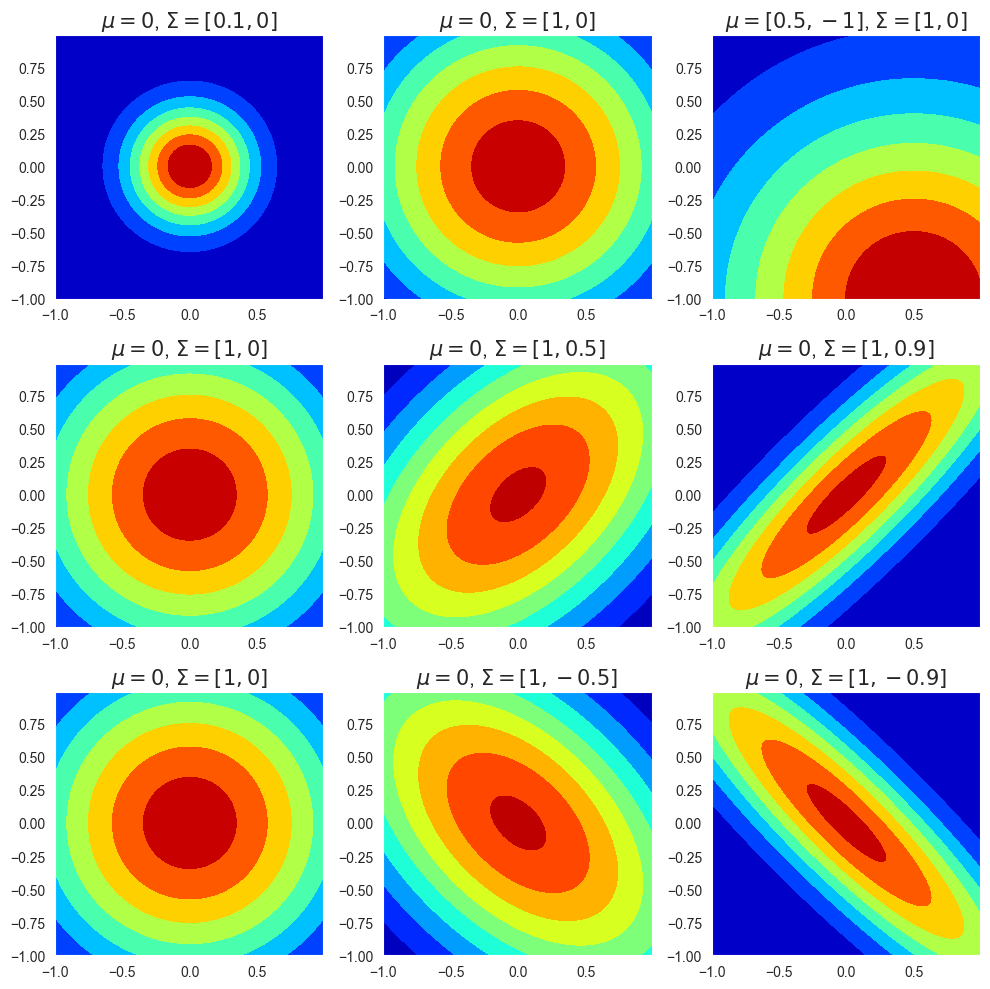

In [24]:
ejemplos_distribuciones_normales()

**`¿ Por qué es importante la covarianza?`** 🚧 (Spoiler)

En el proceso de optimización de carteras, la covarianza es fundamental para entender cómo los activos interactúan entre sí. La diversificación es una estrategia clave para reducir el riesgo de una cartera, y la covarianza ayuda a identificar qué activos pueden ser combinados para lograr una menor volatilidad general.

\begin{equation*}
\begin{aligned}
    & \min_{w} w^{\top} \Sigma w \\
    & \text{st.} \\
    & \quad w^{\top} \mathbf{\mu} = \mu_p \quad \\
    & \quad \sum_{i=1}^{n}w_i = 1 \\
    & \quad w_i \geq 0\quad \forall i\in\mathbb{N}
\end{aligned}
\end{equation*}

Donde $w$ es el vector de pesos de la cartera, $\Sigma$ es la matriz de varianzas y covarianzas, $\mathbf{\mu}$ es el vector de retornos esperados, y $\mu_p$ es el retorno esperado de la cartera. Las ponderaciones óptimas de la cartera se pueden calcular resolviendo el problema de optimización anterior. La solución se puede expresar como:

\begin{equation*}
w^{*} = \Sigma^{-1} \left[ \frac{\mu_p A-B}{AC - B^2}\mu + \frac{C-\mu_p B}{AC - B^2} \mathbb{1} \right]
\end{equation*}

La solución analítica obtenida para el problema de minimización de varianza sujeto a un retorno objetivo muestra que los pesos óptimos del portafolio pueden expresarse como una combinación lineal de dos portafolios fundamentales: *uno asociado al mínimo riesgo absoluto* (portafolio de varianza mínima global) y otro orientado al *retorno ajustado por riesgo* (portafolio tangente). Esta combinación está ponderada según el retorno objetivo deseado, y se apoya en tres cantidades claves: $A$, $B$, $C$ que *encapsulan toda la información sobre los retornos esperados y la estructura de riesgo del mercado*.

Este resultado implica que cualquier portafolio eficiente, en términos de la teoría moderna de portafolios, se puede construir como una mezcla de estos dos portafolios base. Además, al variar el retorno objetivo $\mu_p$, se genera toda la frontera eficiente, la cual representa el conjunto de portafolios con mínima varianza para cada nivel de retorno. Esta frontera constituye el eje central para la toma de decisiones óptimas de inversión bajo incertidumbre.

In [25]:
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2022-01-01'
end_date = '2023-12-31'

# Descargar datos de precios
data = yf.download(tickers, start = start_date, end = end_date, progress = False)['Close']

# Calcular retornos diarios
returns = data.pct_change().dropna()

# Covarianza de los Retornos
returns.cov()

Ticker,AAPL,GOOGL,MSFT
Ticker,,,
AAPL,0.000335,0.000283,0.000263
GOOGL,0.000283,0.000483,0.000310
MSFT,0.000263,0.000310,0.000375


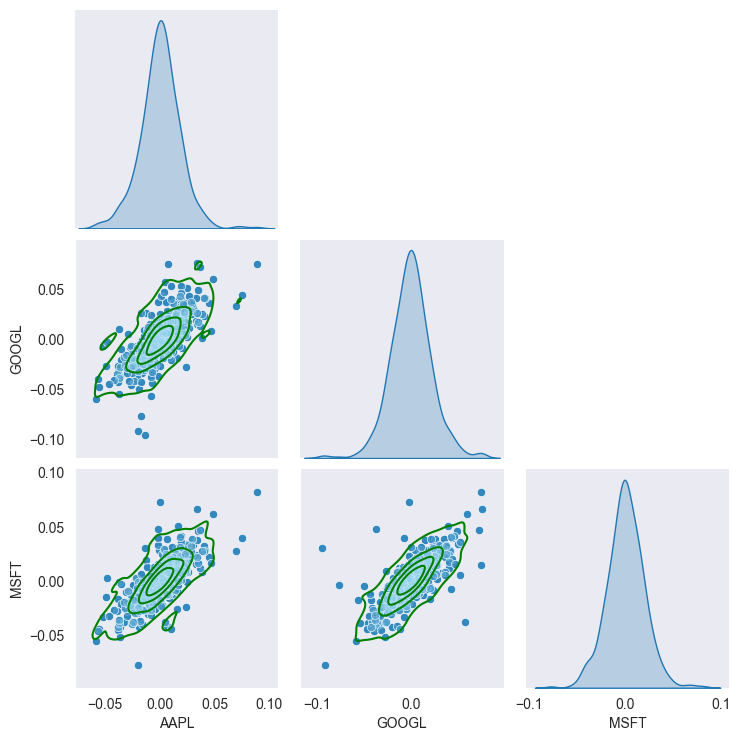

In [26]:
g = sns.pairplot(returns, diag_kind="kde", corner = True)
g.map_lower(sns.kdeplot, levels = 5, color = "green")
g.map_offdiag(sns.scatterplot, alpha=0.2, color = "skyblue")

## 🍃 Comparación Estadística de Activos 

### Diferencia de Medias y Varianza entre Grupos

Comparar dos activos financieros implica evaluar si sus medias y varianzas son significativamente diferentes. 

* `Diferencia de Medias`: Comparar las medias de retorno entre dos o más activos permite evaluar si hay un rendimiento promedio significativamente diferente. Se usa principalmente para contrastar activos en términos de rentabilidad esperada. Algunas herramientas estadísticas comunes para esta tarea incluyen:
  
  * **Prueba $t$ de Student**: Se utiliza para comparar las medias de dos grupos independientes. Asume que los datos son normalmente distribuidos y que las varianzas son iguales (o se ajusta para varianzas desiguales).
  
  * **ANOVA (Análisis de Varianza)**: Se utiliza para comparar las medias de tres o más grupos. Permite evaluar si al menos una media es significativamente diferente de las demás. Si se encuentra una diferencia significativa, se pueden realizar pruebas post-hoc para identificar qué grupos son diferentes.
  
  * **Prueba de Mann-Whitney U**: Es una prueba no paramétrica que compara las medianas de dos grupos independientes. Es útil cuando los datos no siguen una distribución normal o cuando las varianzas son desiguales.
  
  * **Prueba de Kruskal-Wallis**: Es una prueba no paramétrica que compara las medianas de tres o más grupos independientes. Es útil cuando los datos no siguen una distribución normal o cuando las varianzas son desiguales.    
   

* `Diferencia de Varianzas`: Comparar las varianzas de retorno entre dos o más activos permite evaluar si hay una volatilidad significativamente diferente. Este analisis permite identificar activos mas volatiles y activos estables (menor varianza). Algunas herramientas estadísticas comunes para esta tarea incluyen:
  
  * **Prueba de Levene**: Se utiliza para evaluar si las varianzas de dos o más grupos son iguales. Es robusta frente a desviaciones de la normalidad.
  
  * **Prueba de Bartlett**: Similar a la prueba de Levene, pero asume que los datos son normalmente distribuidos. Es más sensible a desviaciones de la normalidad.

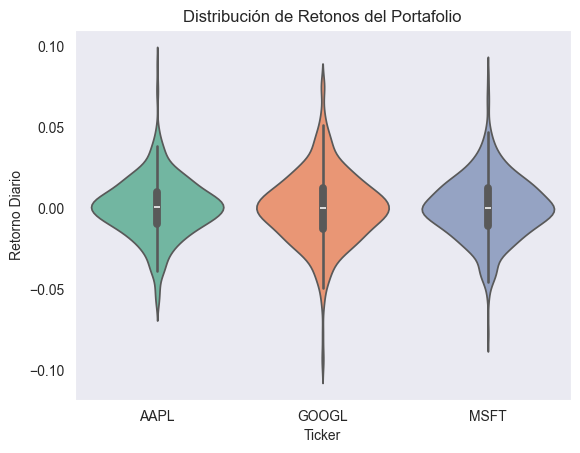

In [27]:
sns.violinplot(data = returns, orient = "v", palette = "Set2")
plt.title("Distribución de Retonos del Portafolio")
plt.ylabel("Retorno Diario")
plt.show()

In [28]:
# Test Estadisticos para diferencia de medias 
from scipy.stats import f_oneway, mannwhitneyu, kruskal, levene, bartlett

# ANOVA 
f_oneway_result = f_oneway(returns['AAPL'], returns['MSFT'], returns['GOOGL'])
print(f"ANOVA F-statistic: {f_oneway_result.statistic}, p-value: {f_oneway_result.pvalue}")

ANOVA F-statistic: 0.026271452949341068, p-value: 0.9740710884527033


In [29]:
# Test de Mann-Whitney U
mannwhitney_result = mannwhitneyu(returns['AAPL'], returns['MSFT'])
print(f"Mann-Whitney U statistic: {mannwhitney_result.statistic}, p-value: {mannwhitney_result.pvalue}")

Mann-Whitney U statistic: 124967.0, p-value: 0.9943216345754042


In [30]:
# Test Kruskal
kruskal_result = kruskal(returns['AAPL'], returns['MSFT'], returns['GOOGL'])
print(f"Kruskal H-statistic: {kruskal_result.statistic}, p-value: {kruskal_result.pvalue}")

Kruskal H-statistic: 0.12978407020977972, p-value: 0.93716863922942


In [31]:
# Test de Levene
levene_result = levene(returns['AAPL'], returns['MSFT'], returns['GOOGL'])
print(f"Levene's test statistic: {levene_result.statistic}, p-value: {levene_result.pvalue}")


Levene's test statistic: 5.652077417311228, p-value: 0.003585546981206842


In [32]:
# Test de Bartlett
bartlett_result = bartlett(returns['AAPL'], returns['MSFT'], returns['GOOGL'])
print(f"Bartlett's test statistic: {bartlett_result.statistic}, p-value: {bartlett_result.pvalue}")

Bartlett's test statistic: 17.707447658041367, p-value: 0.00014284880010315297


### Criterios para identificar activos líderes o más estables

🔹 Activo líder:
* Alta rentabilidad media (retorno promedio).
* Bajo o moderado riesgo.
* Alta ratio de Sharpe.
* Buen comportamiento en periodos de alta volatilidad (resiliencia).
* Alta liquidez y volumen.

🔹 Activo estable:
* Baja varianza o desviación estándar.
* Bajo drawdown máximo.
* Baja correlación con el resto del portafolio.